In [ ]:
from zipfile import ZipFile
import os

zip_path = 'archive (9).zip'

with ZipFile(zip_path, 'r') as zip_ref:
    zip_contents = zip_ref.namelist()
    zip_ref.extractall('unzipped_archive_9')

zip_contents

['healthcare-dataset-stroke-data.csv']

In [ ]:
import pandas as pd

data_path = 'unzipped_archive_9/healthcare-dataset-stroke-data.csv'
stroke_data = pd.read_csv(data_path)

display(stroke_data.head())
stroke_data.info(), stroke_data.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


(None,
                  id          age  hypertension  heart_disease  \
 count   5110.000000  5110.000000   5110.000000    5110.000000   
 mean   36517.829354    43.226614      0.097456       0.054012   
 std    21161.721625    22.612647      0.296607       0.226063   
 min       67.000000     0.080000      0.000000       0.000000   
 25%    17741.250000    25.000000      0.000000       0.000000   
 50%    36932.000000    45.000000      0.000000       0.000000   
 75%    54682.000000    61.000000      0.000000       0.000000   
 max    72940.000000    82.000000      1.000000       1.000000   
 
        avg_glucose_level          bmi       stroke  
 count        5110.000000  4909.000000  5110.000000  
 mean          106.147677    28.893237     0.048728  
 std            45.283560     7.854067     0.215320  
 min            55.120000    10.300000     0.000000  
 25%            77.245000    23.500000     0.000000  
 50%            91.885000    28.100000     0.000000  
 75%           114.

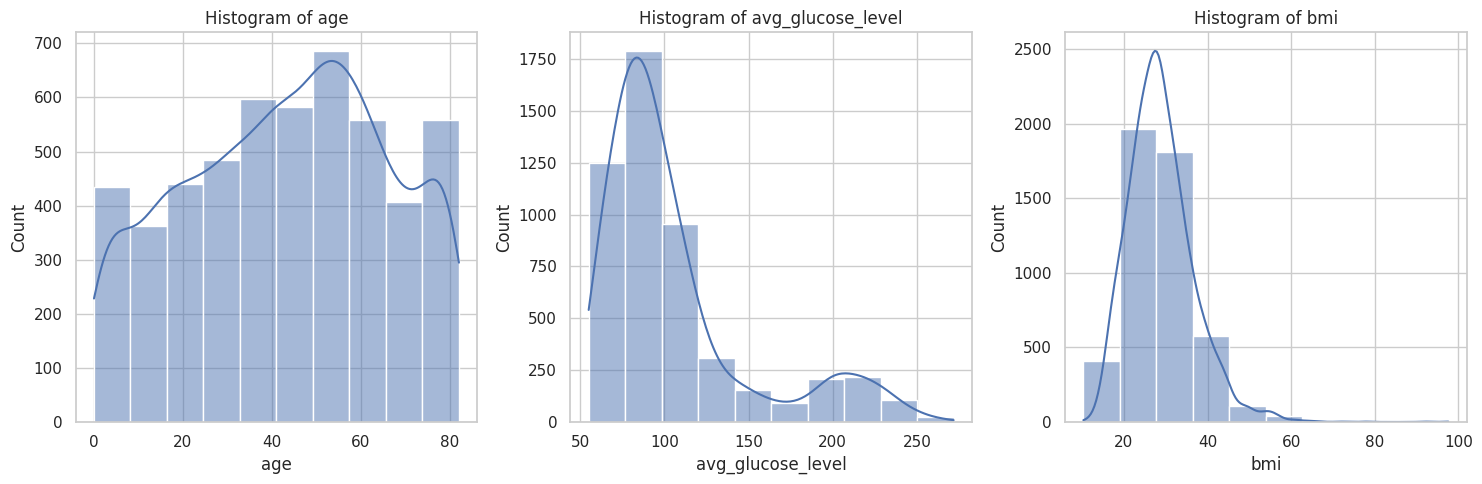

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

def plot_histograms(data, columns, bins=10, figsize=(15, 5)):
    fig, axes = plt.subplots(1, len(columns), figsize=figsize)
    for ax, col in zip(axes, columns):
        sns.histplot(data[col], bins=bins, kde=True, ax=ax)
        ax.set_title(f'Histogram of {col}')
    plt.tight_layout()
    plt.show()

numeric_columns = ['age', 'avg_glucose_level', 'bmi']

plot_histograms(stroke_data, numeric_columns)

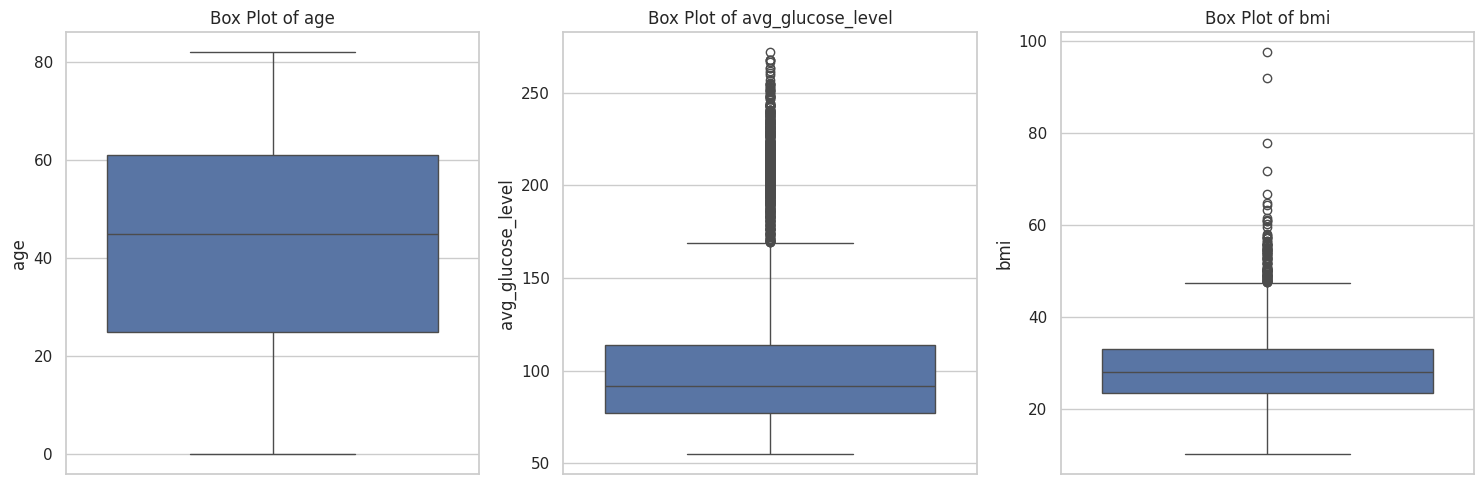

In [ ]:
def plot_boxplots(data, columns, figsize=(15, 5)):
    fig, axes = plt.subplots(1, len(columns), figsize=figsize)
    for ax, col in zip(axes, columns):
        sns.boxplot(y=data[col], ax=ax)
        ax.set_title(f'Box Plot of {col}')
    plt.tight_layout()
    plt.show()

plot_boxplots(stroke_data, numeric_columns)

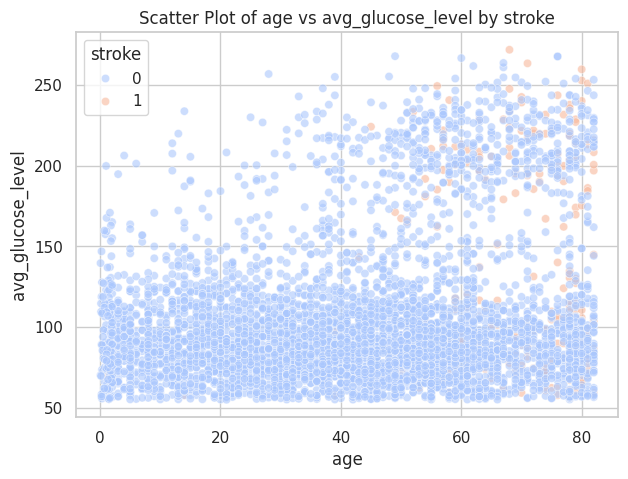

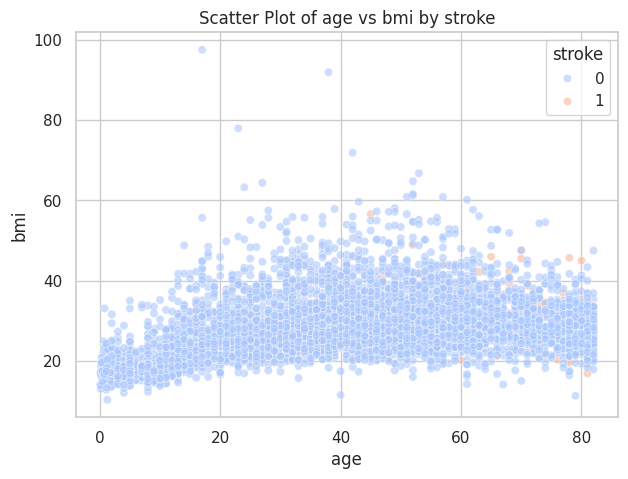

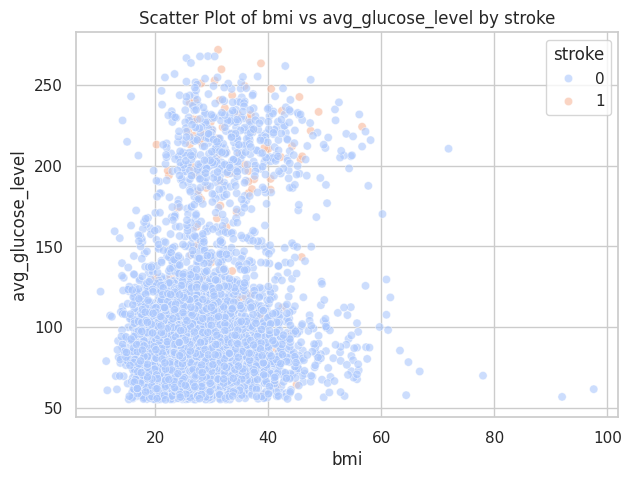

In [ ]:
def plot_scatter(data, x, y, hue, figsize=(7, 5)):
    plt.figure(figsize=figsize)
    sns.scatterplot(data=data, x=x, y=y, hue=hue, palette='coolwarm', alpha=0.6)
    plt.title(f'Scatter Plot of {x} vs {y} by {hue}')
    plt.show()

plot_scatter(stroke_data, 'age', 'avg_glucose_level', 'stroke')
plot_scatter(stroke_data, 'age', 'bmi', 'stroke')
plot_scatter(stroke_data, 'bmi', 'avg_glucose_level', 'stroke')

In [ ]:
stroke_data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
descriptive_stats = stroke_data[numeric_columns].describe()
mode_values = stroke_data[numeric_columns].mode().loc[0]
variance_values = stroke_data[numeric_columns].var()

descriptive_stats.loc['mode'] = mode_values
descriptive_stats.loc['variance'] = variance_values

descriptive_stats

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000
mode,78.000000,93.880000,28.700000
variance,511.331792,2050.600820,61.686364


In [ ]:
correlation_matrix = stroke_data[numeric_columns + ['stroke']].corr()
correlation_matrix

,age,avg_glucose_level,bmi,stroke
age,1.000000,0.238171,0.333398,0.245257
avg_glucose_level,0.238171,1.000000,0.175502,0.131945
bmi,0.333398,0.175502,1.000000,0.042374
stroke,0.245257,0.131945,0.042374,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numeric_columns = ['age', 'avg_glucose_level', 'bmi']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

X = stroke_data.drop('stroke', axis=1)
y = stroke_data['stroke']

X_preprocessed = preprocessor.fit_transform(X)
X_preprocessed.shape

(5110, 19)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.3, random_state=42, stratify=y)

X_train.shape, X_test.shape

((3577, 19), (1533, 19))

In [ ]:
bmi_median = stroke_data['bmi'].median()
stroke_data['bmi'].fillna(bmi_median, inplace=True)

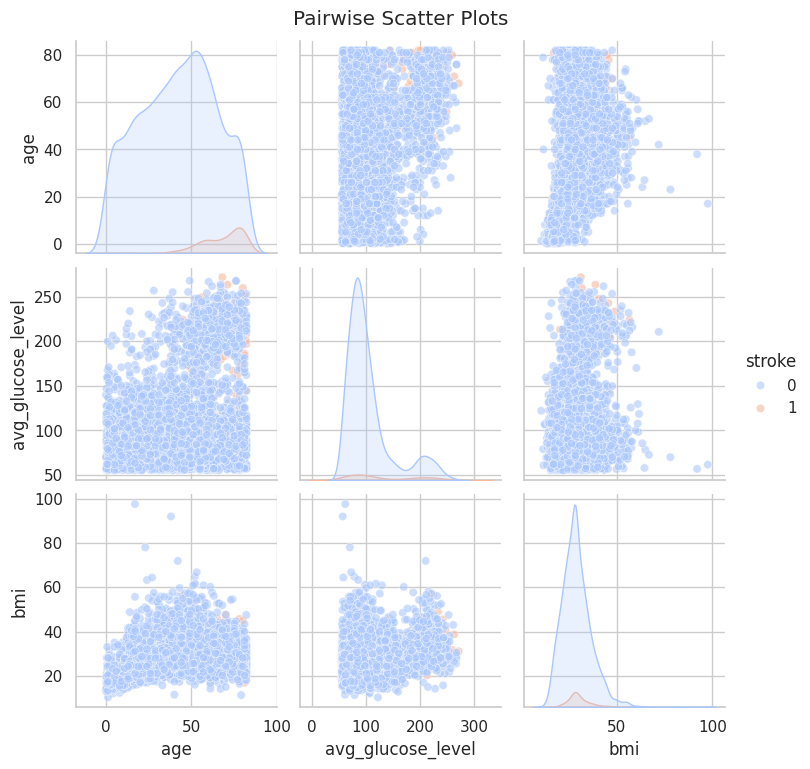

In [ ]:
def plot_pairplot(data, vars, hue):
    sns.pairplot(data, vars=vars, hue=hue, palette='coolwarm', plot_kws={'alpha': 0.6})
    plt.suptitle('Pairwise Scatter Plots', y=1.02)
    plt.show()

pairwise_columns = ['age', 'avg_glucose_level', 'bmi']

plot_pairplot(stroke_data, pairwise_columns, 'stroke')

In [ ]:
import numpy as np
print(np.isnan(X_train).any())
print(np.isnan(X_test).any())

True
True


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

logistic_model = LogisticRegression(random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)

logistic_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

logistic_predictions = logistic_model.predict(X_test)
decision_tree_predictions = decision_tree_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)

eval_metrics = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, logistic_predictions),
        accuracy_score(y_test, decision_tree_predictions),
        accuracy_score(y_test, random_forest_predictions)
    ],
    'Precision': [
        precision_score(y_test, logistic_predictions),
        precision_score(y_test, decision_tree_predictions),
        precision_score(y_test, random_forest_predictions)
    ],
    'Recall': [
        recall_score(y_test, logistic_predictions),
        recall_score(y_test, decision_tree_predictions),
        recall_score(y_test, random_forest_predictions)
    ],
    'F1 Score': [
        f1_score(y_test, logistic_predictions),
        f1_score(y_test, decision_tree_predictions),
        f1_score(y_test, random_forest_predictions)
    ]
}

metrics_df = pd.DataFrame(eval_metrics)
metrics_df

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.951076,0.000000,0.000000,0.000000
1,Decision Tree,0.904762,0.134021,0.173333,0.151163
2,Random Forest,0.949772,0.250000,0.013333,0.025316
